<a href="https://colab.research.google.com/github/blowmeaway1234/Artificial-Intelligence/blob/main/Midterm_Recognition_5_Kind_Of_Flow_build_with_ANN_using_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Load dataset Flower

In [ ]:
!ls gdrive/MyDrive/DataSetFlower # test data 

Flower.zip


In [ ]:
! unzip gdrive/MyDrive/DataSetFlower/Flower.zip

Archive:  gdrive/MyDrive/DataSetFlower/Flower.zip
replace flowers/daisy/100080576_f52e8ee070_n.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating

# Preprocessor Data

In [ ]:
# Check testdata
!ls flowers/| wc -l

5


In [ ]:
import tensorflow as tf
from pathlib import Path
train_root = Path('flowers/')
# convert to string type
filelist_ds= tf.data.Dataset.list_files(str(train_root/'*/*')) # 2 level scan (train_root to folders 0 - 9 then access each one)
# 9 random elements
for file in filelist_ds.take(10):
  print(file) #filename path in tf.data

tf.Tensor(b'flowers/tulip/14039130008_f4b2807607_n.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/dandelion/17851831751_35b071f4b0.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/tulip/7166560822_27b1d1d132_n.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/tulip/1353748522_b9c630b162.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/dandelion/1074999133_1e4a1e042e.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/dandelion/34662996866_af256e8f10_n.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/rose/3415176946_248afe9f32.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/dandelion/18803577858_fd0036e1f5_m.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/daisy/2578695910_5ab8ee17c1_n.jpg', shape=(), dtype=string)
tf.Tensor(b'flowers/rose/9369421752_db1ab2a6a4_m.jpg', shape=(), dtype=string)


In [ ]:
def get_label(file_path):
  parts = tf.strings.split(file_path, '/')
  #part[0] = train
  #part[1] = 0/1.../9
  #part[2] = filename
  if parts[-2] == "daise": #1
    labels=[0,0,0,0,1]
  elif parts[-2] == "dandelion": #2
    labels=[1,0,0,0,0]
  elif parts[-2] == "rose": #3
    labels=[0,1,0,0,0]
  elif parts[-2] == "sunflower": #4
    labels=[0,0,1,0,0]
  else:#daise
    labels=[0,0,0,0,1] #5
    #return labels value but have to convert to tensor becase string we use is python not tf.tensor
  return tf.convert_to_tensor(labels) 

In [ ]:
# Test
for file in filelist_ds.take(10):
  print('filename',file.numpy().decode('utf-8')) # utf8 bỏ tf.tensor
  print('label:',get_label(file).numpy())

filename flowers/rose/3554620445_082dd0bec4_n.jpg
label: [0 1 0 0 0]
filename flowers/rose/410421672_563550467c.jpg
label: [0 1 0 0 0]
filename flowers/tulip/7166606598_5d2cd307c3_n.jpg
label: [0 0 0 0 1]
filename flowers/dandelion/5886830036_2b99899c95.jpg
label: [1 0 0 0 0]
filename flowers/dandelion/13920113_f03e867ea7_m.jpg
label: [1 0 0 0 0]
filename flowers/tulip/9947385346_3a8cacea02_n.jpg
label: [0 0 0 0 1]
filename flowers/tulip/5718512292_aa50a9a473_n.jpg
label: [0 0 0 0 1]
filename flowers/dandelion/34256868592_ca3ffd6b15_n.jpg
label: [1 0 0 0 0]
filename flowers/rose/9216323421_f737c1d50e.jpg
label: [0 1 0 0 0]
filename flowers/daisy/2877860110_a842f8b14a_m.jpg
label: [0 0 0 0 1]


In [ ]:
from tensorflow._api.v2 import image
# Preprocessing function
img_height = 180
img_width = 180
def preprocessing(file_path): #data we have just a file list but data for train model must be pixel value
  # Read file
  img = tf.io.read_file(file_path)
  img = tf.image.decode_jpeg(img,channels=3) # 1 is gray, 3 is color; we use image function of tf.image ; jpeg because jpg is our flie
  # Transform
    # Conver from uint 8 to float 32 and Normalize value to [0,1]
  img = tf.image.convert_image_dtype(img,tf.float32)
    # Resize
  img = tf.image.resize(img,[img_width,img_height])
    # Get image label
  label = get_label(file_path)
  # Return
  return img, label

In [ ]:
ds_size = 25000 #(shuffle size) 
# Set parameter
batch_size = 256
# Build data
train_ds = filelist_ds.shuffle(ds_size) # Shuffling the input and it doesn't have labels
train_ds = train_ds.map(preprocessing,num_parallel_calls=tf.data.AUTOTUNE) # Process each element + get labels => train_ds = pixel val and labels
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(8) # chia luồn data


# Build Model

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 176, 176, 10)      760       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 88, 88, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 84, 84, 20)        5020      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 42, 42, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 38, 38, 30)        1503

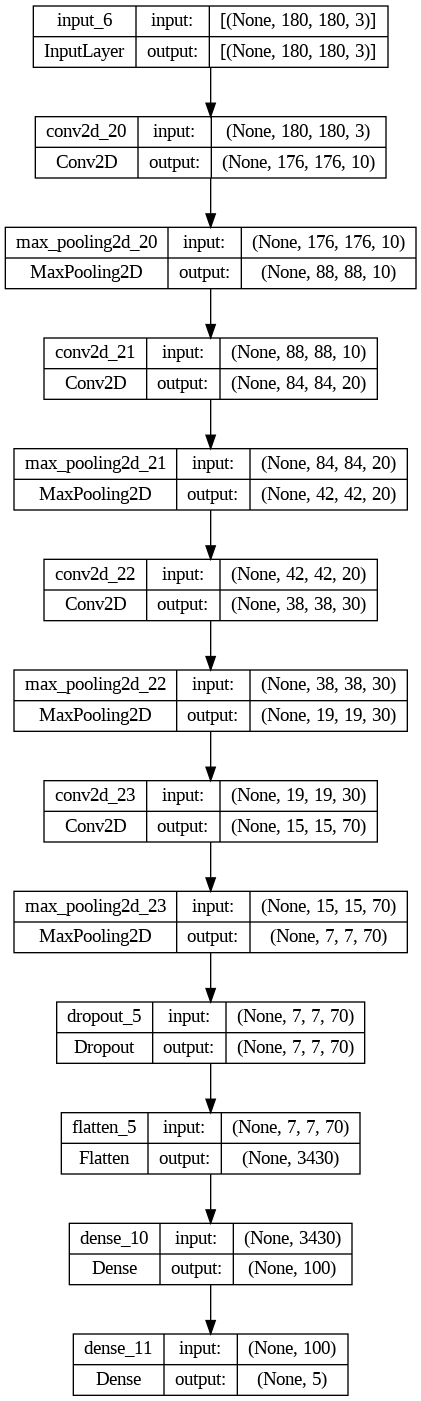

In [ ]:

import tensorflow as tf
from tensorflow.keras import layers
#build model
model = tf.keras.Sequential()
inputs = tf.keras.Input(shape=(img_width,img_height,3))
x = layers.Conv2D(10,5,strides=(1,1),padding = 'valid',activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Conv2D(20,5,strides=(1,1),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Conv2D(30,5,strides=(1,1),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Conv2D(70,5,strides=(1,1),padding='valid',activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2),strides=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(100,activation='relu')(x)
output = layers.Dense(5, activation ='softmax')(x)

model = tf.keras.Model(inputs=inputs,outputs=output)
# Show neural network
model.summary()
# Draw Graph
tf.keras.utils.plot_model(model,'model.png',show_shapes=True)

#Compile and traning model


In [ ]:
# Compile model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics=["accuracy"] #caculate accuracy on each batch
)

In [ ]:
# Train model
model.fit(train_ds, epochs = 10)

Epoch 1/10
17/17 [==============================] - 13s 324ms/step - loss: 1.3427 - accuracy: 0.4051
Epoch 2/10
17/17 [==============================] - 6s 356ms/step - loss: 1.1315 - accuracy: 0.4848
Epoch 3/10
17/17 [==============================] - 7s 435ms/step - loss: 0.9814 - accuracy: 0.5654
Epoch 4/10
17/17 [==============================] - 6s 353ms/step - loss: 0.9237 - accuracy: 0.5946
Epoch 5/10
17/17 [==============================] - 7s 420ms/step - loss: 0.8888 - accuracy: 0.6213
Epoch 6/10
17/17 [==============================] - 8s 456ms/step - loss: 0.8304 - accuracy: 0.6472
Epoch 7/10
17/17 [==============================] - 6s 357ms/step - loss: 0.7846 - accuracy: 0.6729
Epoch 8/10
17/17 [==============================] - 6s 356ms/step - loss: 0.7291 - accuracy: 0.7026
Epoch 9/10
17/17 [==============================] - 6s 350ms/step - loss: 0.7224 - accuracy: 0.7042
Epoch 10/10
17/17 [==============================] - 8s 430ms/step - loss: 0.6858 - accuracy: 0.722

In [ ]:
model.save('5kindflowerCNN.h5')

1/1 [==============================] - 0s 92ms/step
[4]


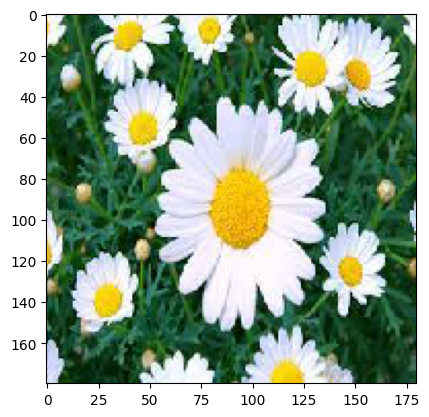

Daisy


In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

my_dict = {0: 'Dandelion', 1: 'Sunflower', 3: 'Tulip',
           2: 'Rose', 4: 'Daisy', 
          }

img = load_img("Daise.jpg", target_size=(180, 180))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 180, 180, 3)
img = img.astype('float32')
img = img / 255
result = np.argmax(model.predict(img), axis=1)
print(result)
plt.show()
print(my_dict[result[0]])